In [1]:
path="https://raw.githubusercontent.com/Ashutoshrx/Covid-19/master/total_cases.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [3]:
data=pd.read_csv(path)
#data=data.dropna()
data.head()

,id,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1,31-12-19,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2,01-01-20,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,3,02-01-20,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,4,03-01-20,44,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,5,04-01-20,44,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [14]:
data[-1:]

,id,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
273,274,29-09-20,33423469,39239.0,13391.0,51213.0,1966.0,4797.0,3.0,101.0,...,1318.0,2010.0,56068.0,12.0,73528.0,1077.0,766.0,2035.0,14660.0,7816.0


In [5]:
data1=data[['id','World']]

In [6]:
data1.head()

,id,World
0,1,27
1,2,27
2,3,27
3,4,44
4,5,44


In [103]:
len(data1)

274

In [125]:
#preparattion of the data
x=np.array(data['id']).reshape(-1,1)
y=np.array(data['World']).reshape(-1,1)

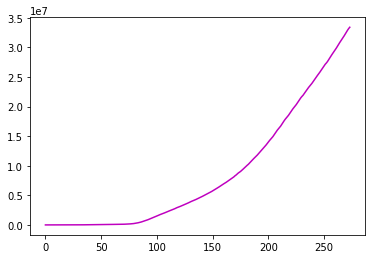

In [126]:
plt.plot(y,'-m')
plt.show()

In [127]:
PolyFeat=PolynomialFeatures(degree=3)
x=PolyFeat.fit_transform(x)

In [128]:
x

array([[1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 2.0000000e+00, 4.0000000e+00, 8.0000000e+00],
       [1.0000000e+00, 3.0000000e+00, 9.0000000e+00, 2.7000000e+01],
       ...,
       [1.0000000e+00, 2.7200000e+02, 7.3984000e+04, 2.0123648e+07],
       [1.0000000e+00, 2.7300000e+02, 7.4529000e+04, 2.0346417e+07],
       [1.0000000e+00, 2.7400000e+02, 7.5076000e+04, 2.0570824e+07]])

In [129]:
#training Data
model=linear_model.LinearRegression()
model.fit(x,y)
accuracy=model.score(x,y)
print(f"Accuracy:{round(accuracy*100,3)}%")

Accuracy:99.918%


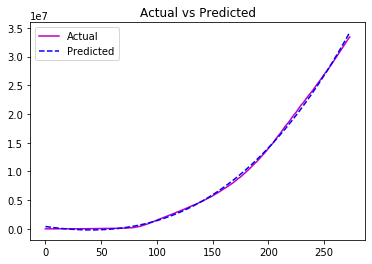

In [130]:
y0=model.predict(x)
plt.title('Actual vs Predicted')
plt.plot(y,'-m',label='Actual')
plt.plot(y0,'--b',label='Predicted')
plt.legend()
#plt.savefig('final.png')
plt.show()


In [131]:
y0.shape

(274, 1)

In [132]:
#MSE
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,y0) 

82203835083.9296

In [133]:
#RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y,y0))
print(rmse)

286712.1118542598


In [134]:
days=30
print(f"Cases after {days} days in worldwide:",end=" ")
predicted_value=PolyFeat.fit_transform([[len(data)+days]])
print(int(model.predict(predicted_value))/1000000,"Million")

Cases after 30 days in worldwide: 45.840813 Million


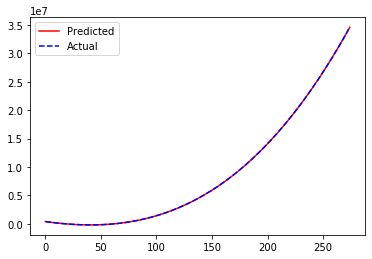

In [114]:
x1=np.array(list(range(1,len(data)+days))).reshape(-1,1)
y1=model.predict(PolyFeat.fit_transform(x1))
plt.plot(y1,'r',label='Predicted')
plt.plot(y0,'--b',label='Actual')
plt.legend()
plt.show()

In [136]:
y0[-10:]

array([[31175153.32308253],
       [31508316.02907253],
       [31843659.60812011],
       [32181190.21929187],
       [32520914.02165444],
       [32862837.17427441],
       [33206965.83621838],
       [33553306.16655298],
       [33901864.32434481],
       [34252646.46866047]])

# INDIA

In [117]:
data['India'] = data['India'].fillna(0)

In [118]:
#preparattion of the data
x_in=np.array(data['id']).reshape(-1,1)
y_in=np.array(data['India']).reshape(-1,1)

In [119]:
PolyFeat=PolynomialFeatures(degree=3)
x_in=PolyFeat.fit_transform(x_in)

In [120]:
#training Data
model=linear_model.LinearRegression()
model.fit(x_in,y_in)
accuracy=model.score(x_in,y_in)
print(f"Accuracy:{round(accuracy*100,3)}%")

Accuracy:99.722%


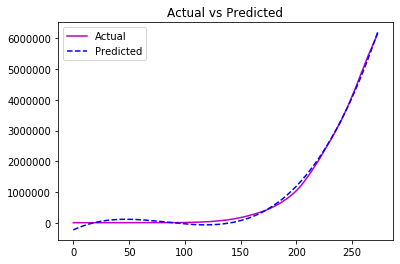

In [121]:
y_in0=model.predict(x_in)
plt.title('Actual vs Predicted')
plt.plot(y_in,'-m',label='Actual')
plt.plot(y_in0,'--b',label='Predicted')
plt.legend()
#plt.savefig('final.png')
plt.show()

In [122]:
day_ins=30
print(f"Cases after {day_ins} days in INDIA:",end=" ")
predicted_value=PolyFeat.fit_transform([[len(data)+day_ins]])
print(int(model.predict(predicted_value))/1000000,"Million")

Cases after 30 days in INDIA: 9.900755 Million


In [123]:
#MSE
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_in,y_in0)

7257987610.586504

In [139]:
y_in[-10:]

array([[5400619.],
       [5487580.],
       [5562663.],
       [5646010.],
       [5732518.],
       [5818570.],
       [5903932.],
       [5992532.],
       [6074702.],
       [6145291.]])